In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
Modelo= HMM(A,B,PI)


In [5]:

data=pd.read_csv('RealROBOT/lecturasconodometria-noisy.txt')
#data=data.iloc[:40,:]

cols=['x','y','theta','y_noise','x_noise','theta_noise']
n_reads=data.shape[1]-6
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]


data.describe()
data.y_noise=data.y_noise*-1

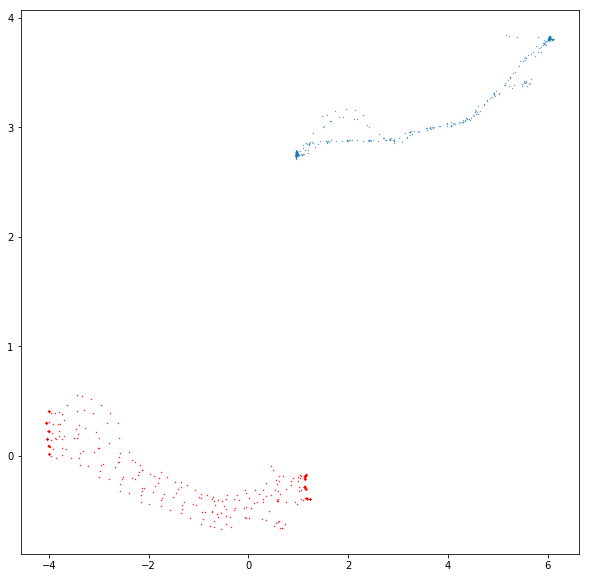

In [6]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x=data.x_noise,y=data.y_noise, s=.2 ,c='r' )
ax1.scatter(x=data.x,y=data.y, s=.1)

In [7]:
rot_ang=3.1416/8
R= np.ones((2,2))
R[0,0]= np.cos(rot_ang)
R[0,1]= -np.sin(rot_ang)
R[1,0]= np.sin(rot_ang)
R[1,1]= np.cos(rot_ang)
rotated=[]
for xy in data[['x_noise','y_noise']].values:
    xy_rotated=np.matmul(R,xy)
    rotated.append(xy_rotated)
rotated=np.asarray(rotated)
data['x_rot']=rotated[:,0]
data['y_rot']=rotated[:,1]
tx=data.x.iloc[0]-data.x_rot.iloc[0]
ty=data.y.iloc[0]-data.y_rot.iloc[0]
tx,ty
data.x_rot=data.x_rot+tx
data.y_rot=data.y_rot+ty


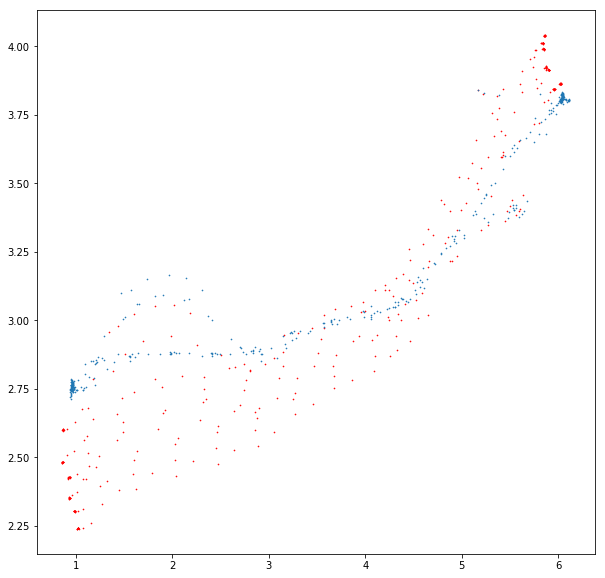

In [8]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x_rot,y=data.y_rot, s=.4 ,c='r' )
ax1.scatter(x=data.x,y=data.y, s=.4)

In [9]:
delta_odom= np.linalg.norm(data[['x','y']].values-data[['x_rot','y_rot']].values,axis=1)
data['delta_odom'] =delta_odom

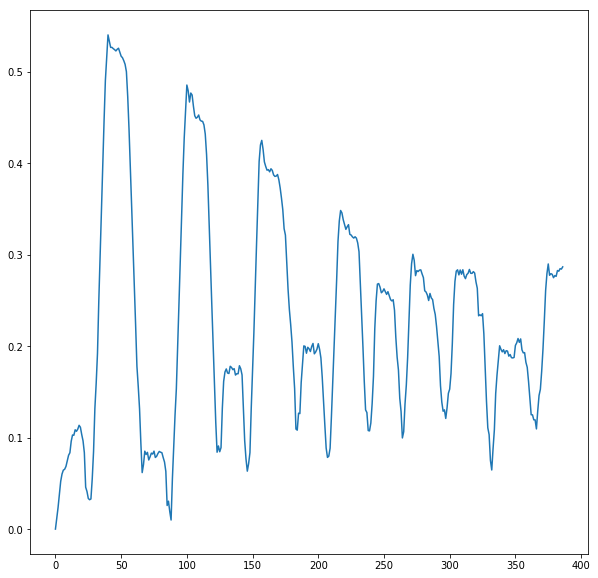

In [10]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(data.delta_odom)

In [11]:
data.delta_odom.describe()

count    387.000000
mean       0.227404
std        0.125001
min        0.000000
25%        0.129119
50%        0.201100
75%        0.284560
max        0.540431
Name: delta_odom, dtype: float64

In [12]:
x_1,y_1,th_1= 0,0,0
delta_mov=[]
delta_th=[]
for x,y,th in zip (data.x,data.y,data.theta):
    
    
    delta_mov.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [13]:
x_1,y_1,th_1= 0,0,0
delta_mov_rot=[]
delta_th_rot=[]
for x,y,th in zip (data.x_rot,data.y_rot,data.theta_noise):
    
    
    delta_mov_rot.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th_rot.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th_rot.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th_rot.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [14]:
delta_th[0],delta_th_rot[0]=0,0

In [15]:
DELTA_TH=pd.DataFrame(np.array(delta_th)-np.array(delta_th_rot))
DELTA_TH.describe()

,0
count,387.000000
mean,-0.000105
std,0.014550
min,-0.062631
25%,-0.009719
50%,0.000809
75%,0.009750
max,0.037794


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ad6deb38>]],
      dtype=object)

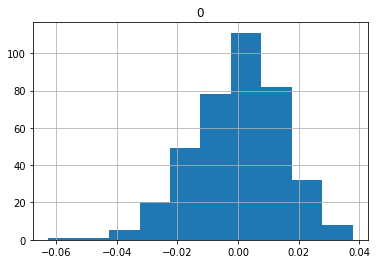

In [16]:
DELTA_TH.hist()

In [17]:
DELTA_MOV=pd.DataFrame(np.array(delta_mov)-np.array(delta_mov_rot))
DELTA_MOV.describe()

,0,1
count,387.000000,387.000000
mean,0.000479,-0.000566
std,0.010180,0.023500
min,-0.038263,-0.051277
25%,-0.004185,-0.012215
50%,0.000477,-0.001206
75%,0.005572,0.007145
max,0.040606,0.058187


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ad699e48>,
      dtype=object)

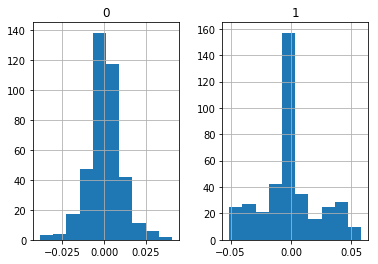

In [18]:
DELTA_MOV.hist()

In [57]:
xyth_od=data[['x_rot','y_rot','theta_noise']]


In [58]:
if True:
    
    K_corpus=16
    N=4
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
aus=[]
aus_odom=[]
auvks=[]
for i,lec,j in zip(xyth.values, lecs.values,xyth_od.values):
    _, au= quantized(i , ccxyth)
    _, au_od= quantized(i , ccxyth)
    aus.append(au)
    aus_odom.append(au_od)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
    auvks.append(auvk)

data['Y']=aus
data['Y_odom']=aus_odom
data['Vk']=auvks


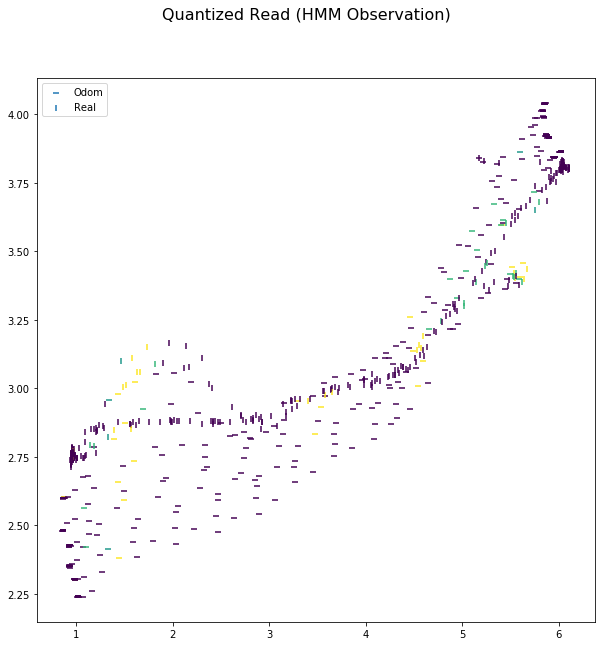

In [52]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Quantized Read (HMM Observation)', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='_' ,c=data.Vk, label='Odom' )
ax1.scatter(x=data.x,y=data.y ,marker='|', c=data.Vk,label='Real')
ax1.legend()

In [42]:
data.Vk.value_counts()

0     339
15     30
10     15
8       3
Name: Vk, dtype: int64

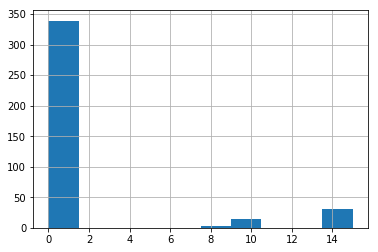

In [43]:
data.Vk.hist()

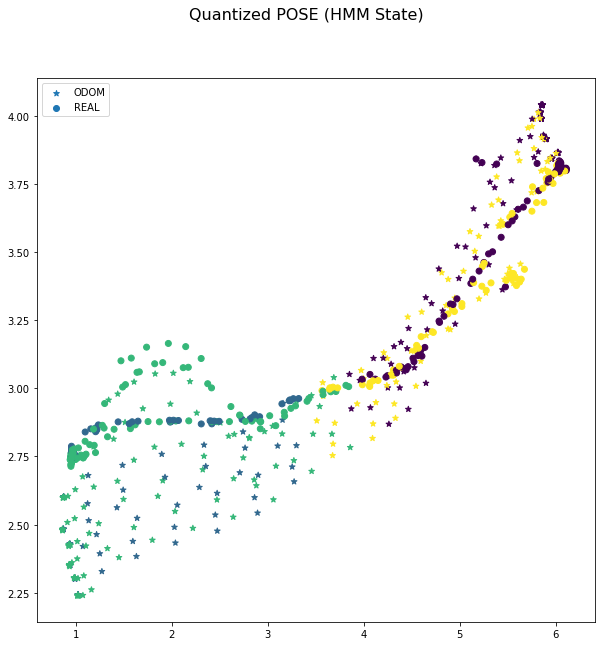

In [59]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
fig.suptitle('Quantized POSE (HMM State)', fontsize=16)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='*' ,c=data.Y_odom  ,label='ODOM')
ax1.scatter(x=data.x,y=data.y , c=data.Y,label='REAL')
ax1.legend()

In [56]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,y,theta,y_noise,x_noise,theta_noise,x_rot,y_rot,delta_odom,Y,Vk
0,4.837,4.786,3.918,3.519,3.503,3.485,3.591,3.667,3.731,3.731,...,3.841103,-0.456413,-0.089141,0.443164,0.756949,5.170155,3.841103,0.000000,1,0
1,2.087,2.077,2.074,2.070,2.049,2.037,2.030,2.016,2.010,2.009,...,3.827890,-0.249890,-0.123866,0.483270,0.982732,5.220498,3.824369,0.011454,1,0
2,2.872,2.872,2.872,2.867,2.860,2.808,2.831,2.829,2.779,2.779,...,3.822501,-0.047217,-0.184033,0.610695,1.199857,5.361248,3.817546,0.023623,1,0
3,1.038,1.040,1.045,1.039,1.038,1.043,1.049,1.036,1.039,1.042,...,3.824503,0.020102,-0.315272,1.004013,1.277146,5.774849,3.846814,0.037892,1,0
4,0.996,1.009,1.009,0.993,0.991,0.994,1.005,1.016,1.017,1.004,...,3.822814,0.100004,-0.391900,1.238858,1.350533,6.021141,3.865890,0.052226,1,0
